# Name - Vishwajeet Singh

## Assignment -1 Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('playstore-analysis (2) (1).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Tasks

## 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [6]:
df.dropna(how = 'any', subset = ['Rating'], inplace = True)

In [7]:
df.Rating.isnull().sum()

0

### b. Check the null values for the Android Ver column.

#### i. Are all 3 records having the same problem?

In [8]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Yes, All 3 records are having same problem.

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
df.drop([10472],inplace = True)

In [10]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [11]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace = True)

In [12]:
df['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10834            4.1 and up
10836            4.1 and up
10837            4.1 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9366, dtype: object

### c. Current ver – replace with most common value

In [13]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace = True)

## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types? 

#### Ans.- Reviews and installs

### b. Price variable – remove $ sign and convert to float

In [14]:
list_of_price = []
for i in df['Price']:
    if i[0]=='$':
        list_of_price.append(i[1:])
    else:
        list_of_price.append(i)

In [15]:
df.drop(labels = df[df['Price'] == 'Everyone'].index, inplace = True)

In [16]:
df['Price'] = list_of_price

In [17]:
df['Price'] = df['Price'].astype('float')

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [18]:
list_of_install = []
for i in df['Installs']:
    list_of_install.append(i.replace(',','').replace('+','').strip())

In [19]:
df['Installs'] = list_of_install

In [20]:
df['Installs'] = df['Installs'].astype('int')

### d. Convert all other identified columns to numeric

In [21]:
df['Reviews'] = df['Reviews'].astype('int')

## 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i. Are there any such records? Drop if so.

In [22]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [23]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Ans.- No any records

### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [24]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


#### Ans.- Yes, 7 records

In [25]:
df1 = df[df['Reviews'] > df['Installs']].index

In [26]:
df.drop(labels = df1, inplace = True)

In [27]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4. Identify and handle outliers – 

### a. Price column

#### i. Make suitable plot to identify outliers in price

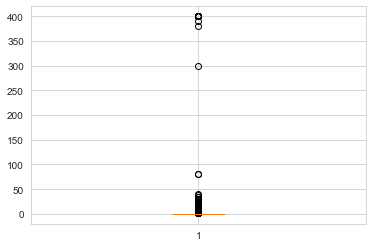

In [28]:
plt.boxplot(df['Price'])
plt.show()

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [29]:
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Ans.- Yes, We can see the cost of apps on play store is greater than $200 

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

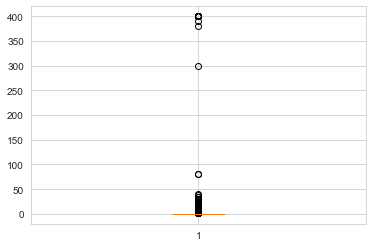

In [30]:
plt.boxplot(df['Price'])
plt.show()

#### iv. Limit data to records with price < $30

In [31]:
limit_price = df[df['Price'] > 30].index

In [32]:
df.drop(labels = limit_price ,inplace = True)

In [33]:
limits_price = df.loc[df['Price'] > 30].index
limits_price.value_counts().sum()

0

### b. Reviews column

#### i. Make suitable plot

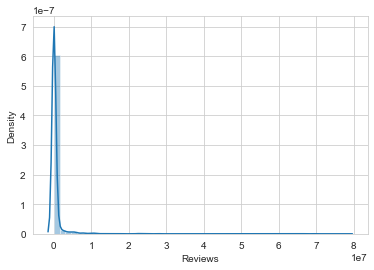

In [34]:
sns.distplot(df['Reviews'])
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [35]:
cnt = df.loc[df['Reviews'] > 1000000].index

In [36]:
cnt.value_counts().sum()

704

### c. Installs

#### i. What is the 95th percentile of the installs?

In [37]:
value = df['Installs'].quantile(0.95)

In [38]:
value

100000000.0

#### ii. Drop records having a value more than the 95th percentile

In [39]:
Quantile_list = df[df["Installs"] > value].index

In [40]:
df.drop(Quantile_list, inplace = True)

In [41]:
Quantile_list.value_counts().sum()

130

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### a. How do you explain this?

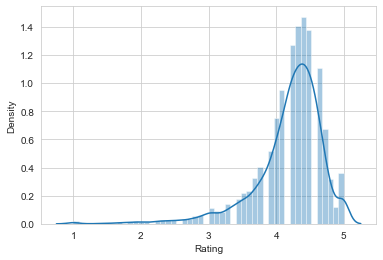

skewness of this distribution is -1.8425872652320243
The Median of this distribution 4.3 is greater than mean 4.190117289313644 of this distribution


In [42]:
sns.distplot(df['Rating'])
plt.show()
print('skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

### b. What is the implication of this on your analysis?

In [43]:
df['Rating'].mode()

0    4.4
dtype: float64

##### Ans.- Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

## 6. What are the top Content Rating values?

In [44]:
df['Content Rating'].value_counts()

Everyone           7303
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### a. Are there any values with very few records?

#### Ans.-  Yes, Adults only 18+ is 3 and Unrated is 1.

### b. If yes, drop those as they won’t help in the analysis

In [45]:
row_data = df[df['Content Rating'] == 'Adults only 18+'].index
df.drop(labels = row_data ,inplace = True)

In [46]:
row_data1 = df[df['Content Rating'] == 'Unrated'].index
df.drop(labels = row_data1 ,inplace = True)

In [47]:
df['Content Rating'].value_counts()

Everyone        7303
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content Rating, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9204 non-null   object 
 1   Category        9204 non-null   object 
 2   Rating          9204 non-null   float64
 3   Reviews         9204 non-null   int32  
 4   Size            9204 non-null   float64
 5   Installs        9204 non-null   int32  
 6   Type            9204 non-null   object 
 7   Price           9204 non-null   float64
 8   Content Rating  9204 non-null   object 
 9   Genres          9204 non-null   object 
 10  Last Updated    9204 non-null   object 
 11  Current Ver     9204 non-null   object 
 12  Android Ver     9204 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 934.8+ KB


## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

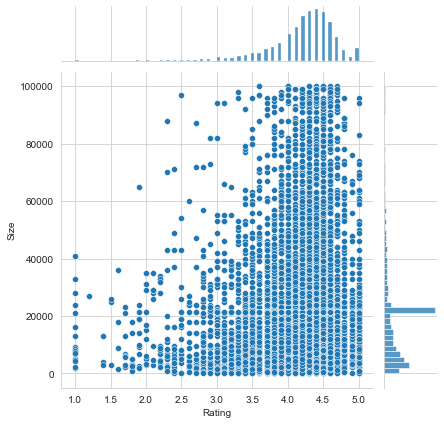

In [49]:
sns.jointplot(x = 'Rating', y = 'Size', data = df, kind = 'scatter')
plt.show()

### b. Do you see any patterns?

#### Yes, patterns can be observed the Size and Rating are co-related

### c. How do you explain the pattern?

#### Ans.- increasing Rating, uses of App is also increases.whenever the price is incressing then the size is also incressing .Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating

### a. Make a jointplot (with regression line)

<Figure size 720x360 with 0 Axes>

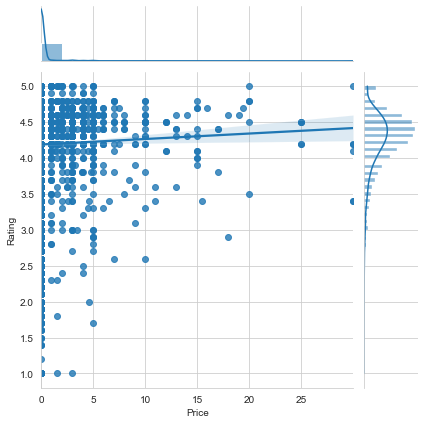

In [50]:
plt.figure(figsize=(10,5))

sns.jointplot('Price','Rating', data=df,kind ='reg')

### b. What pattern do you see?

#### We can see Rating lie between 4.0 and 4.5 through this pattern.

### c. How do you explain the pattern?

#### In this pattern Rating continuously increasing order, whene

### d. Replot the data, this time with only records with price > 0 

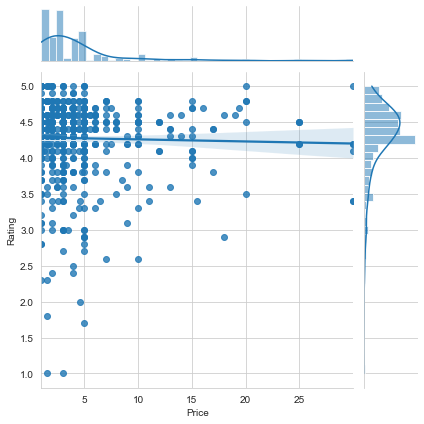

In [51]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

### e. Does the pattern change?


#### Ans.- Yes, record with Price > 0, the overall pattern changed the regression very  weakly Negative Correlation between Price and Rating.

### f. What is your overall inference on the effect of price on the rating

#### Ans.- Icreasing the Prices, does not have effect on Higher Rating. For Higher Price, Rating should be High, like it can be grater then 4

## 9. Look at all the numeric interactions together – 

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

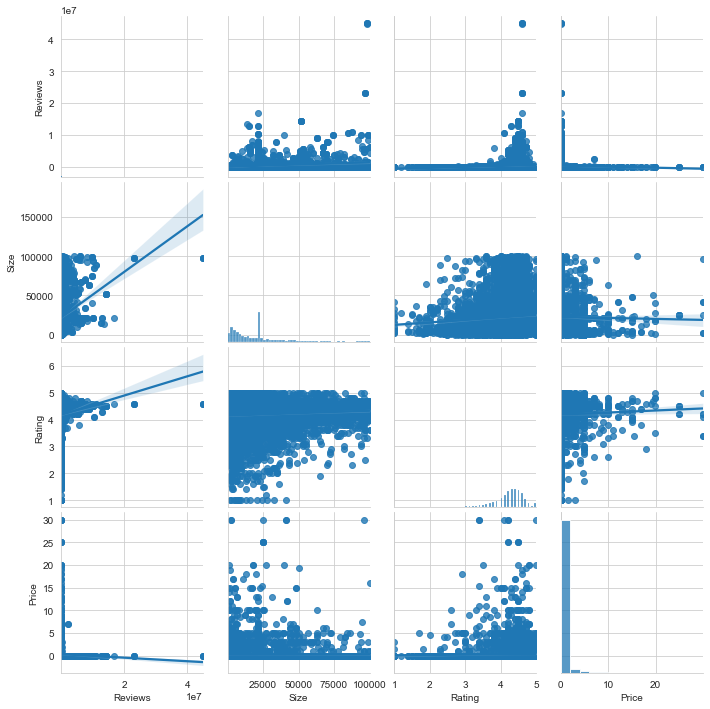

In [52]:
sns.pairplot(df,vars = ['Reviews','Size','Rating','Price'],kind = 'reg')
plt.show()

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

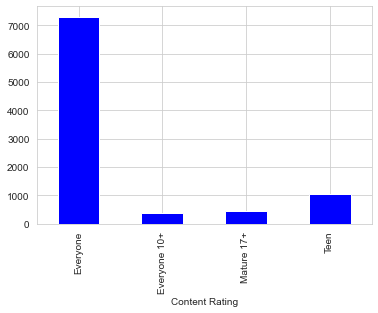

In [53]:
counted_value = df.groupby(['Content Rating'])['Rating'].count()
counted_value.plot.bar(color = 'blue')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?


#### Ans.- median because in case of Outliers , median is the best matirc.

### c. Choose the right metric and plot

In [54]:
#plt.boxplot(df['Rating'])
#plt.show()

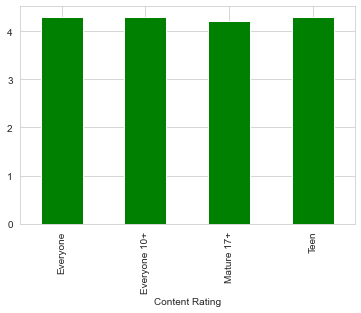

In [55]:
counted_value = df.groupby(['Content Rating'])['Rating'].median()
counted_value.plot.bar(color = 'green')
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [56]:
df['Content Rating'].value_counts()

Everyone        7303
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content Rating, dtype: int64

In [57]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-10k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-10k,4.149206,4.247561,4.015183,4.190289
20k-40k,4.226398,4.194413,4.193370,4.237500
40k-60k,4.192857,4.265957,4.202222,4.270896
60k-80k,4.272052,4.356818,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [58]:
x = pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
x

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-10k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


### c. Make a heatmap of this

#### i. Annotated

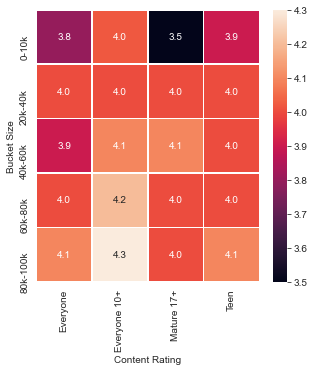

In [59]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(x,annot = True, linewidth = .5, fmt = '.1f',ax = ax)
plt.show()

#### ii. Greens color map

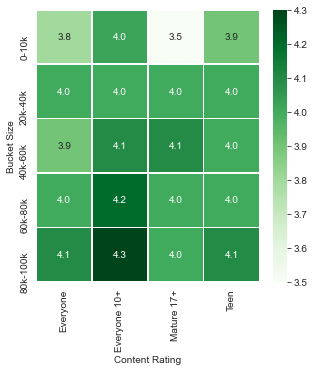

In [60]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(x,annot = True, linewidth = .5, fmt = '.1f',ax = ax,cmap = 'Greens')
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

#### Ans.- Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories